In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

awards = pd.read_csv("awards_data.csv")
player_data = pd.read_csv("player_stats.csv")
team_data = pd.read_csv("team_stats.csv")
rebounding_data = pd.read_csv("team_rebounding_data_22.csv")

## Average number of points, rebounds, and assists per game for players in the 2007-2021 seasons who won All NBA First, Second, Third teams, and players who were in the All-Star Game

In [2]:
awards

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,2015,1626170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
4325,2015,1626202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
4326,2015,1626273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
4327,2018,1628971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [3]:
# Create new df from awards with just nbapersonid, All NBA First Team, and season

awards_1st = awards[['nbapersonid', 'All NBA First Team', 'season']].copy()
awards_1st = awards_1st.dropna()
awards_1st.drop(awards_1st[awards_1st['All NBA First Team'] == 0.0].index, inplace = True)
awards_1st

,nbapersonid,All NBA First Team,season
0,708.0,1.0,2007
4,977.0,1.0,2007
29,2544.0,1.0,2007
32,2730.0,1.0,2007
35,101108.0,1.0,2007
...,...,...,...
658,203507.0,1.0,2021
661,203999.0,1.0,2021
663,1626164.0,1.0,2021
668,1628369.0,1.0,2021


In [4]:
player_data

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,1630648,Jordan Schakel,2021,NaN,2021,1610612764,WAS,4,0,30,...,0.000,0.078,0.191,-0.2,0.0,-0.1,-8.6,-4.4,-13.0,-0.1
8488,1630557,Corey Kispert,2021,15.0,2021,1610612764,WAS,77,36,1801,...,0.010,0.085,0.146,1.6,0.7,2.3,-0.8,-1.5,-2.3,-0.1
8489,1628398,Kyle Kuzma,2017,27.0,2021,1610612764,WAS,66,66,2204,...,0.022,0.141,0.242,0.0,2.0,2.0,0.2,-0.4,-0.2,1.0
8490,203526,Raul Neto,2013,47.0,2021,1610612764,WAS,70,19,1372,...,0.002,0.139,0.184,0.7,0.8,1.5,-2.5,-0.5,-3.0,-0.4


In [5]:
# Create new df from player_data df with just nbapersonid, points, rebounds, assists, games, and season

player_data_filt = player_data[['nbapersonid', 'points', 'tot_reb', 'ast', 'games', 'season']].copy()
player_data_filt['nbapersonid'] = player_data_filt['nbapersonid'].astype(float)
player_data_filt

,nbapersonid,points,tot_reb,ast,games,season
0,2585.0,322,248,36,62,2007
1,200780.0,35,42,0,35,2007
2,2746.0,1394,667,272,81,2007
3,201151.0,235,57,113,56,2007
4,101136.0,200,24,28,35,2007
...,...,...,...,...,...,...
8487,1630648.0,5,8,0,4,2021
8488,1630557.0,634,209,85,77,2021
8489,1628398.0,1130,561,233,66,2021
8490,203526.0,526,134,217,70,2021


In [6]:
# Merge awards_1st and player_data_filt to see NBA All First Team points, games, and season

merged_1st = player_data_filt.merge(awards_1st, left_on = ['nbapersonid', 'season'],
                                   right_on = ['nbapersonid', 'season'], how = 'inner')
merged_1st

,nbapersonid,points,tot_reb,ast,games,season,All NBA First Team
0,708.0,1337,655,244,71,2007,1.0
1,2544.0,2250,592,539,75,2007,1.0
2,977.0,2323,517,441,82,2007,1.0
3,101108.0,1684,321,925,80,2007,1.0
4,2730.0,1695,1161,110,82,2007,1.0
...,...,...,...,...,...,...,...
70,1628369.0,2046,609,334,76,2021,1.0
71,1629029.0,1847,593,568,65,2021,1.0
72,203999.0,2004,1019,584,74,2021,1.0
73,203507.0,2002,778,388,67,2021,1.0


In [7]:
# define a function to average the points, rebounds, assists per game of all the All NBA First Team players

def avg_pps(df):
    total_points = df['points'].sum()
    total_games = df['games'].sum()
    ppg = total_points / total_games
    return ppg

def avg_rebs(df):
    total_points = df['tot_reb'].sum()
    total_games = df['games'].sum()
    reb = total_points / total_games
    return reb

def avg_asts(df):
    total_points = df['ast'].sum()
    total_games = df['games'].sum()
    asts = total_points / total_games
    return asts

print('Average points:', avg_pps(merged_1st), 'Average rebounds:', avg_rebs(merged_1st), 
      'Average assists:', avg_asts(merged_1st))

Average points: 25.845622956774427 Average rebounds: 8.031783508899382 Average assists: 5.921540138031238


In [16]:
# Repeat same steps for NBA All Second Team

awards_2nd = awards[['nbapersonid', 'All NBA Second Team', 'season']].copy()
awards_2nd = awards_2nd.dropna()
awards_2nd.drop(awards_2nd[awards_2nd['All NBA Second Team'] == 0.0].index, inplace = True)

merged_2nd = awards_2nd.merge(player_data_filt, how = 'inner', left_on = 'nbapersonid', right_on = 'nbapersonid')

print('Average points:', avg_pps(merged_2nd), 'Average rebounds:', avg_rebs(merged_2nd), 
      'Average assists:', avg_asts(merged_2nd))

Average points: 20.200686043753535 Average rebounds: 6.710675643622165 Average assists: 5.099330377506523


In [18]:
# Repeat same steps for NBA All Third Team

awards_3rd = awards[['nbapersonid', 'All NBA Third Team', 'season']].copy()
awards_3rd = awards_3rd.dropna()
awards_3rd.drop(awards_3rd[awards_3rd['All NBA Third Team'] == 0.0].index, inplace = True)

merged_3rd = awards_3rd.merge(player_data_filt, how = 'inner', left_on = 'nbapersonid', right_on = 'nbapersonid')

print('Average points:', avg_pps(merged_3rd), 'Average rebounds:', avg_rebs(merged_3rd), 
      'Average assists:', avg_asts(merged_3rd))

Average points: 18.079576680282212 Average rebounds: 6.799721500185666 Average assists: 4.2092833271444485


In [19]:
# Repeat same steps for players who made the all star game

awards_allstar = awards[['nbapersonid', 'all_star_game', 'season']].copy()
awards_allstar = awards_allstar.dropna()
awards_allstar.drop(awards_allstar[awards_allstar['all_star_game'] == False].index, inplace = True)

merged_allstar = awards_allstar.merge(player_data_filt, how = 'inner', left_on = 'nbapersonid',
                                      right_on = 'nbapersonid')

print('Average points:', avg_pps(merged_allstar), 'Average rebounds:', avg_rebs(merged_allstar), 
      'Average assists:', avg_asts(merged_allstar))

Average points: 19.392791988859823 Average rebounds: 6.519281213905071 Average assists: 4.628873064592157


## Average points, rebounds, assists for all NBA players

In [31]:
# Average points, rebounds, assists for all NBA players

player_data_avg = player_data[['nbapersonid', 'player', 'season', 'games', 'points', 'tot_reb', 'ast']]
player_data_avg

,nbapersonid,player,season,games,points,tot_reb,ast
0,2585,Zaza Pachulia,2007,62,322,248,36
1,200780,Solomon Jones,2007,35,35,42,0
2,2746,Josh Smith,2007,81,1394,667,272
3,201151,Acie Law,2007,56,235,57,113
4,101136,Salim Stoudamire,2007,35,200,24,28
...,...,...,...,...,...,...,...
8487,1630648,Jordan Schakel,2021,4,5,8,0
8488,1630557,Corey Kispert,2021,77,634,209,85
8489,1628398,Kyle Kuzma,2021,66,1130,561,233
8490,203526,Raul Neto,2021,70,526,134,217


In [29]:
player_data_avg['avg points'] = player_data_avg.apply(lambda row: row.points / row.games, axis = 1)
player_data_avg['avg rebounds'] = player_data_avg.apply(lambda row: row.tot_reb / row.games, axis = 1)
player_data_avg['avg assists'] = player_data_avg.apply(lambda row: row.ast / row.games, axis = 1)
player_data_avg

,nbapersonid,player,season,games,points,tot_reb,ast,avg points,avg rebounds,avg assists
0,2585,Zaza Pachulia,2007,62,322,248,36,5.193548,4.000000,0.580645
1,200780,Solomon Jones,2007,35,35,42,0,1.000000,1.200000,0.000000
2,2746,Josh Smith,2007,81,1394,667,272,17.209877,8.234568,3.358025
3,201151,Acie Law,2007,56,235,57,113,4.196429,1.017857,2.017857
4,101136,Salim Stoudamire,2007,35,200,24,28,5.714286,0.685714,0.800000
...,...,...,...,...,...,...,...,...,...,...
8487,1630648,Jordan Schakel,2021,4,5,8,0,1.250000,2.000000,0.000000
8488,1630557,Corey Kispert,2021,77,634,209,85,8.233766,2.714286,1.103896
8489,1628398,Kyle Kuzma,2021,66,1130,561,233,17.121212,8.500000,3.530303
8490,203526,Raul Neto,2021,70,526,134,217,7.514286,1.914286,3.100000


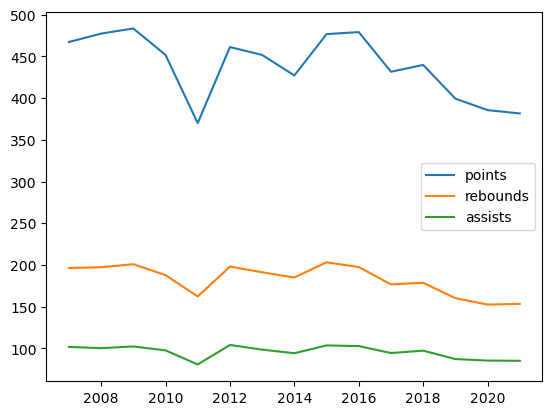

In [105]:
# Average points, rebounds, assists for all NBA players per season

player_data_avg_season = player_data_avg.groupby('season')['points', 'tot_reb', 'ast'].mean()

plt.plot(player_data_avg_season.index, player_data_avg_season['points'], label = 'points')
plt.plot(player_data_avg_season.index, player_data_avg_season['tot_reb'], label = 'rebounds')
plt.plot(player_data_avg_season.index, player_data_avg_season['ast'], label = 'assists')
plt.legend()
plt.show()

## Average time it takes for a player to make an all NBA team selection

In [11]:
# Create new df from awards with just All NBA First, Second and Third Team players

awards_allnba = awards[['season', 'nbapersonid', 'All NBA First Team', 'All NBA Second Team',
                        'All NBA Third Team']].copy()
awards_allnba = awards_allnba.dropna()
awards_allnba = awards_allnba[((awards_allnba["All NBA First Team"] != 0.0) |
                              (awards_allnba["All NBA Second Team"] != 0.0) |
                              (awards_allnba["All NBA Third Team"] != 0.0))]
awards_allnba

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team
0,2007,708.0,1.0,0.0,0.0
3,2007,959.0,0.0,1.0,0.0
4,2007,977.0,1.0,0.0,0.0
6,2007,1495.0,0.0,1.0,0.0
7,2007,1503.0,0.0,0.0,1.0
...,...,...,...,...,...
666,2021,1627783.0,0.0,0.0,1.0
668,2021,1628369.0,1.0,0.0,0.0
676,2021,1629027.0,0.0,0.0,1.0
677,2021,1629029.0,1.0,0.0,0.0


In [12]:
# Replace duplicate All NBA player seasons with the earliest season

awards_allnba = awards_allnba.drop_duplicates('nbapersonid', keep = 'first')
awards_allnba

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team
0,2007,708.0,1.0,0.0,0.0
3,2007,959.0,0.0,1.0,0.0
4,2007,977.0,1.0,0.0,0.0
6,2007,1495.0,0.0,1.0,0.0
7,2007,1503.0,0.0,0.0,1.0
...,...,...,...,...,...
614,2020,203078.0,0.0,0.0,1.0
620,2020,203944.0,0.0,1.0,0.0
663,2021,1626164.0,1.0,0.0,0.0
676,2021,1629027.0,0.0,0.0,1.0


In [13]:
# Filter player_data to just nbapersonid, player, draftyear, and season

player_data_filt2 = player_data[['nbapersonid', 'player', 'draftyear', 'season']].copy()

In [14]:
# Merge awards_allnba and player_data_filt2

merged_awards_allnba = player_data_filt2.merge(awards_allnba, how = 'inner',
                                                left_on = ['nbapersonid', 'season'],
                                               right_on = ['nbapersonid', 'season'])
merged_awards_allnba

,nbapersonid,player,draftyear,season,All NBA First Team,All NBA Second Team,All NBA Third Team
0,708,Kevin Garnett,1995,2007,1.0,0.0,0.0
1,1718,Paul Pierce,1998,2007,0.0,0.0,1.0
2,2544,LeBron James,2003,2007,1.0,0.0,0.0
3,1717,Dirk Nowitzki,1998,2007,0.0,1.0,0.0
4,2397,Yao Ming,2002,2007,0.0,0.0,1.0
...,...,...,...,...,...,...,...
69,203944,Julius Randle,2014,2020,0.0,1.0,0.0
70,203078,Bradley Beal,2012,2020,0.0,0.0,1.0
71,1629027,Trae Young,2018,2021,0.0,0.0,1.0
72,1629630,Ja Morant,2019,2021,0.0,1.0,0.0


In [15]:
# Subtract all values of draftyear column from season column and average the values

avg_exp = (merged_awards_allnba['season'].sum() - merged_awards_allnba['draftyear'].sum()) / len(merged_awards_allnba)
avg_exp

5.297297297297297